In [1]:
include("PVCR.jl");

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:407
└ @ PyCall /Users/arnavgautam/.julia/packages/PyCall/ttONZ/src/PyCall.jl:407
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = get_nsrdb_sam_df() at retrieve_nsrdb_data.jl:92
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:92
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = #get_nsrdb_sam_pv_output#73(::Bool, ::Function) at retrieve_nsrdb_data.jl:100
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:100


 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.33 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.66 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.99 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.32 %  @ 5075
19.98 %  @ 5250
20.65 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.98 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.31 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.64 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750


In [2]:
include("functions/retrieve_nsrdb_data.jl");

In [3]:
nsrdb_sam_df = get_nsrdb_sam_df()

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = get_nsrdb_sam_df() at retrieve_nsrdb_data.jl:92
└ @ Main /Users/arnavgautam/Documents/Research/Jose_Daniel_Lara/arnav_PVCR/functions/retrieve_nsrdb_data.jl:92


 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.33 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.66 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.99 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.32 %  @ 5075
19.98 %  @ 5250
20.65 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.98 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.31 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.64 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750


,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Generation
0,2010,1,1,0,30,0,0,0,0.1,17,162.14,0.000000
1,2010,1,1,1,30,0,0,0,0.1,16,150.52,0.000000
2,2010,1,1,2,30,0,0,0,0.1,16,137.27,0.000000
3,2010,1,1,3,30,0,0,0,0.2,16,123.57,0.000000
4,2010,1,1,4,30,0,0,0,0.2,16,109.78,0.000000
5,2010,1,1,5,30,0,0,0,0.2,16,96.04,0.000000
6,2010,1,1,6,30,86,50,277,0.2,17,82.49,0.074541
7,2010,1,1,7,30,317,92,637,0.2,18,69.32,0.275033
8,2010,1,1,8,30,546,113,791,0.2,20,56.84,0.453538
9,2010,1,1,9,30,348,315,47,0.2,21,45.65,0.277131


┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("text/html")}, ::PyObject) at PyCall.jl:895
└ @ PyCall /Users/arnavgautam/.julia/packages/PyCall/ttONZ/src/PyCall.jl:895


In [4]:
cols = nsrdb_sam_df[:columns];
colnames = map(Symbol, cols);
y = DataFrame([nsrdb_sam_df[c][:values] for c in colnames]);
names!(y, colnames);

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = (::getfield(Main, Symbol("##77#78")))(::Symbol) at none:0
└ @ Main ./none:0
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = (::getfield(Main, Symbol("##77#78")))(::Symbol) at none:0
└ @ Main ./none:0


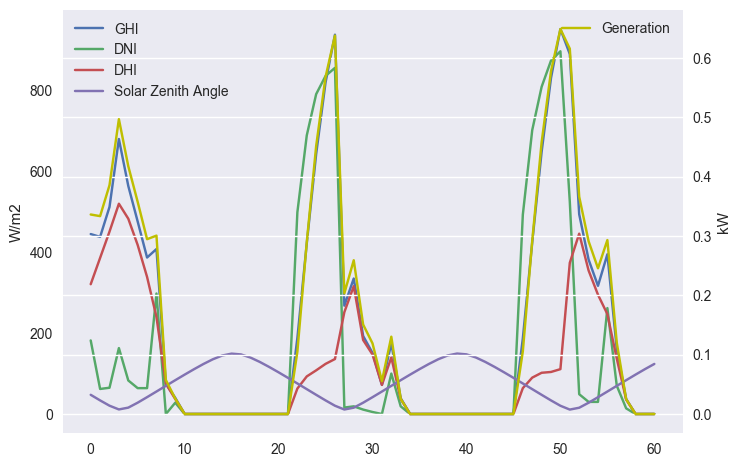

PyObject <matplotlib.legend.Legend object at 0x1174a9208>

In [5]:
plot_pysam_output(y, 4785, 60)

In [6]:
open("data/nsrdb_sam_data_file.txt", "w") do io
   writedlm(io, values(y[:Generation]))
end

In [10]:
typeof(y[:Generation])

Array{Float64,1}

In [8]:
# pv_output_from_file=readdlm("data/pv_output.txt", '\t', Float64, '\n')
# sum(pv_output_from_file)